In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# Keras API
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir ="/content/drive/MyDrive/MINI PROJECT/Disease images/train"
test_dir="/content/drive/MyDrive/MINI PROJECT/Disease images/test"

# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

0 Classes
0 Train images
0 Test images


FileNotFoundError: ignored

# New Section

In [ ]:
train_generator.class_indices

{'Bacterial Disease': 0,
 'Fungal Disease': 1,
 'Healthy silkworm': 2,
 'Protozen Disease': 3,
 'Viral Disease ': 4}

In [ ]:
test_generator.class_indices

{'Bacterial Disease': 0,
 'Fungal Disease': 1,
 'Healthy silkworm': 2,
 'Protozen Disease': 3,
 'Viral Disease': 4}

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=[256,256,3],activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))          
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [ ]:
# Model building to get trained with parameters.
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_fit=model.fit(train_generator,steps_per_epoch=5,epochs=80,validation_data=test_generator)

Epoch 1/80
5/5 [==============================] - 49s 8s/step - loss: 2.2066 - accuracy: 0.4125 - val_loss: 1.5886 - val_accuracy: 0.2500
Epoch 2/80
5/5 [==============================] - 11s 2s/step - loss: 1.3727 - accuracy: 0.5548 - val_loss: 2.1757 - val_accuracy: 0.2368
Epoch 3/80
5/5 [==============================] - 9s 2s/step - loss: 1.1934 - accuracy: 0.6250 - val_loss: 1.6873 - val_accuracy: 0.2368
Epoch 4/80
5/5 [==============================] - 9s 2s/step - loss: 1.2273 - accuracy: 0.6000 - val_loss: 1.8638 - val_accuracy: 0.2368
Epoch 5/80
5/5 [==============================] - 6s 1s/step - loss: 1.2387 - accuracy: 0.5875 - val_loss: 1.7323 - val_accuracy: 0.2368
Epoch 6/80
5/5 [==============================] - 6s 1s/step - loss: 1.1139 - accuracy: 0.5959 - val_loss: 1.6295 - val_accuracy: 0.2368
Epoch 7/80
5/5 [==============================] - 5s 1s/step - loss: 1.0703 - accuracy: 0.6096 - val_loss: 1.4829 - val_accuracy: 0.2368
Epoch 8/80
5/5 [=======================

In [ ]:
classes=['Bacterial Disease','Fungal Disease','Healthy silkworm','Protozen Disease','Viral Disease ']

In [ ]:
img=plt.imread('/content/peprine.jpg')

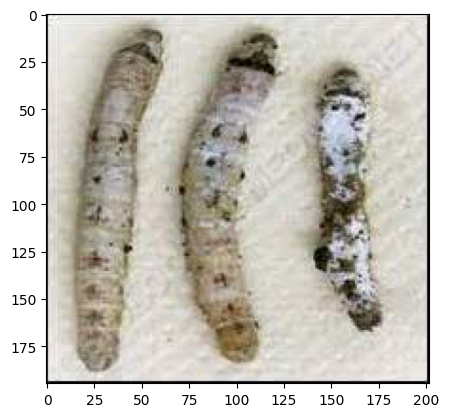

In [ ]:
img=plt.imshow(img)

In [ ]:
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skimage import transform

In [ ]:
resize=transform.resize(img,(256,256,3))

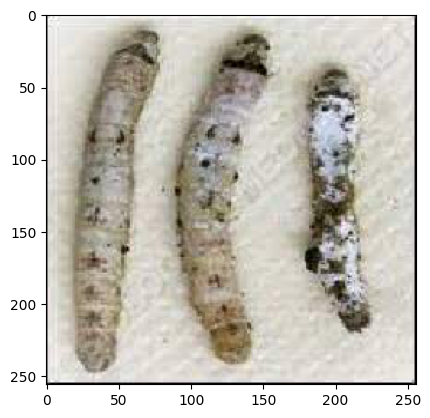

In [ ]:
img=plt.imshow(np.squeeze(img))

1/1 [==============================] - 0s 35ms/step


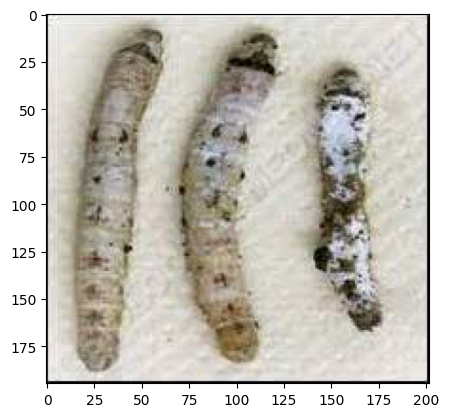

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/peprine.jpg')])
disease=image.load_img('/content/peprine.jpg')
plt.imshow(disease)

In [ ]:
result

array([[0.04957069, 0.00604181, 0.00300274, 0.9274593 , 0.01392552]],
      dtype=float32)

In [ ]:
list_index=[0,1,2,3,4]
x=result 
for i in range(5):
  for j in range(5):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp

print(list_index)      

[3, 0, 4, 1, 2]


Protozen Disease


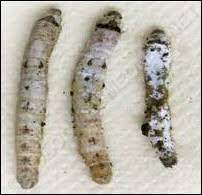

In [ ]:
for i in range(1):
  print(classes[list_index[i]])
disease  